# Hedging and Monte-Carlo Methods

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In [1]:
#Package Import
import numpy as np
import pandas as pd
#import yfinance as yf
#import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style('darkgrid')

**The Risk-Neutral Assumption**: Let $r$ be the risk-free interest rate. A stocks distribution of values at a time $t$ starting from time $0$ is often assumed to be modeled by the *risk-neutral distribution*

$$S_t = S_0e^{\left(r-\frac{\sigma^2}{2}\right)t + \sigma\sqrt{t}\mathcal{N}(0,1)}.$$

The Black-Scholes call and option pricing formulas work in a theoretical framework so that no matter the drift term $\mu$ of the model of the geometric Brownian motion model $S_t=S_0e^{\left(\mu-\frac{\sigma^2}{2}\right)t + \sigma\sqrt{t}\mathcal{N}(0,1)}$, one can substitute the risk-neutral model for $S_t$ to derive closed form formula for the expected value of a call and put option discounted to time $0$:

$$C_0 = e^{-rt}E[\max(S_t-K,0)]\quad \mbox{and} \quad P_0 = e^{-rt}E[\max(-S_t+K,0)].$$

**Caution**: The risk-neutral assumption is often not a good assumption to make about real-world stock paths. The theoretical framework of Black-Scholes requires assumptions that are far from reality.

**A Motivation to assume Risk-Neutral** Develop modeling techniques in the risk-neutral envionment, where closed form solutions exist, allow one to compare simulated values with precise values provided by closed form solutions. Modeling techniques can be adapted to more complicated environments where closed form solutions do not exist.

In [2]:
#Import functions associated with Black-Scholes Equations

%run functions_black_scholes.py


import types

# List all functions in functions_black_scholes.py
function_list = [name for name, obj in globals().items() if isinstance(obj, types.FunctionType)]
print(function_list[1:])


['bs_call', 'bs_put', 'bs_call_delta', 'bs_put_delta', 'bs_gamma', 'bs_vega', 'bs_call_theta', 'bs_put_theta', 'bs_call_rho', 'bs_put_rho']


In [3]:
help(bs_call)

Help on function bs_call in module __main__:

bs_call(S0, K, sigma, t, r=0)
    Computes the Black-Scholes price of a European call option.
    
    Parameters:
        S0 (float): Current asset price
        K (float): Strike price
        sigma (float): Annualized volatility (standard deviation of log returns)
        t (float): Time to expiration (in years)
        r (float): Risk-free interest rate (annualized)
    
    Returns:
        float: Call option price



In [8]:
### Monte-Carlo Simulation Black-Scholes price of a call option
### This means we assume stock follows risk-neutral path
### We'll take the average of call payouts over simulated stock movements

S0 = 35
K = 37
sigma = .4
t = 1
r = 0.03

# Simulated stock path end points
n_sims = 1000
random_noise = np.random.normal(0,1,n_sims)
exponent = (r-.5*sigma**2)*t + sigma*np.sqrt(t)*random_noise
end_points = S0*np.exp(exponent)

#Call_values
call_values = np.exp(-r*t)*np.maximum(end_points - K, 0)

#Monte_Carlo estimated value of call option discounted to time 0
MC_call_value = np.mean(call_values)



#Print findings and compare with theoretical value

print(f'Monte-Carlo simulated value of call option with {n_sims} simulations: ${MC_call_value: .2f}')
print('----'*17)
print('----'*17)
print(f'Black-Scholes Call option value: ${bs_call(S0,K,sigma,t,r):.2f}')

print('----'*17)
print('----'*17)

Monte-Carlo simulated value of call option with 1000 simulations: $ 5.93
--------------------------------------------------------------------
--------------------------------------------------------------------
Black-Scholes Call option value: $5.18
--------------------------------------------------------------------
--------------------------------------------------------------------


### Standard Error and the 68-95-99.7 Rule

The *standard error* of the sample mean $\overline{X}$ from simulations $X_1, X_2, \ldots, X_n$ with sample standard deviation $\sigma_n$ is given by

$$
\sigma_{\overline{X}} = \frac{\sigma_n}{\sqrt{n}}.
$$

By the **Central Limit Theorem**, the distribution of $\overline{X}$ approximates a normal distribution as $n$ becomes large. The **68-95-99.7 rule** (empirical rule) implies:

a) There is approximately a **68%** probability that  
$$|\overline{X} - \mathbb{E}[X]| \leq \sigma_{\overline{X}};$$

b) There is approximately a **95%** probability that  
$$|\overline{X} - \mathbb{E}[X]| \leq 2\sigma_{\overline{X}};$$

c) There is approximately a **99.7%** probability that  
$$|\overline{X} - \mathbb{E}[X]| \leq 3\sigma_{\overline{X}}.$$

In [11]:
### Perform an increased number of simulations in Monte-Carlo simulation of call option.
#Check convergence via standard error

S0 = 35
K = 37
sigma = .4
t = 1
r = 0.03

print(f'Black-Scholes Call option value: ${bs_call(S0,K,sigma,t,r):.2f}')

print('----'*17)
print('----'*17)

simulation_counts = [1000, 10000, 100000, 1000000]

for n_sims in simulation_counts:
    # Simulated stock path end points
    random_noise = np.random.normal(0,1,n_sims)
    exponent = (r-.5*sigma**2)*t + sigma*np.sqrt(t)*random_noise
    end_points = S0*np.exp(exponent)

    #Call_values
    call_values = np.exp(-r*t)*np.maximum(end_points - K, 0)

    #Monte_Carlo estimated value of call option discounted to time 0
    MC_call_value = np.mean(call_values)
    
    std_error = np.std(call_values)/np.sqrt(n_sims)

   



    #Print findings

    print(f'Monte-Carlo simulated value of call option with {n_sims} simulations: ${MC_call_value: .2f}')
    print('----'*17)
    print('----'*17)
    print(f'Standard error in {n_sims} simulation: ${std_error}')

    print('----'*17)
    print('----'*17)

Black-Scholes Call option value: $5.18
--------------------------------------------------------------------
--------------------------------------------------------------------
Monte-Carlo simulated value of call option with 1000 simulations: $ 5.15
--------------------------------------------------------------------
--------------------------------------------------------------------
Standard error in 1000 simulation: $0.32768869908203885
--------------------------------------------------------------------
--------------------------------------------------------------------
Monte-Carlo simulated value of call option with 10000 simulations: $ 5.17
--------------------------------------------------------------------
--------------------------------------------------------------------
Standard error in 10000 simulation: $0.10277853741843096
--------------------------------------------------------------------
--------------------------------------------------------------------
Monte-Carlo

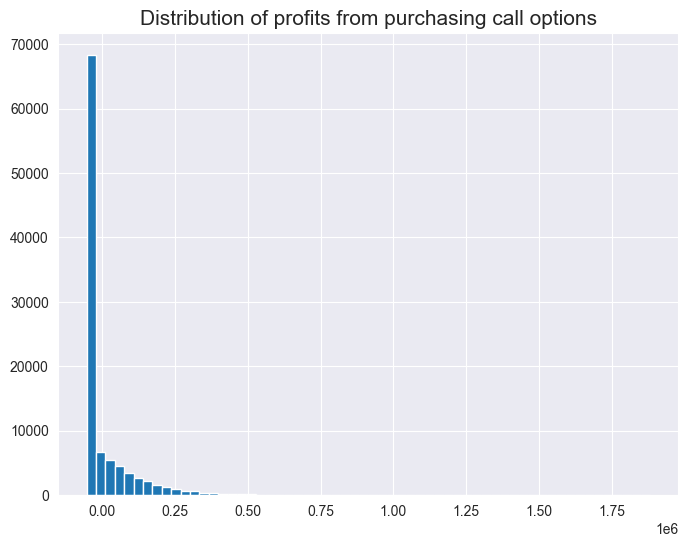

In [14]:
###Simulate payoffs of buying a 100 call options, visualize payoffs with histogram


S0 = 35
K = 37
sigma = .4
t = 1
r = 0.03
premium = 5.40
options_purchased = 10000
n_sims = 100000

# Simulated stock path end points
random_noise = np.random.normal(0,1,n_sims)
exponent = (r-.5*sigma**2)*t + sigma*np.sqrt(t)*random_noise
end_points = S0*np.exp(exponent)

#Call_payouts
call_payouts = np.maximum(end_points - K, 0)

#Call values discounted to time 0
call_values = np.exp(-r*t)*call_payouts




#P&L from purchasing call options discounted to time 0
call_option_profits = options_purchased*(call_values - premium)

#Visual of distribution of profits
plt.figure(figsize = (8,6))
plt.hist(call_option_profits,bins = 60)
plt.title('Distribution of profits from purchasing call options', size = 15)

plt.show()



In [15]:
#Print data

expected_profit = np.mean(call_option_profits)

std_error = np.std(call_option_profits)/np.sqrt(n_sims)

max_loss = np.min(call_option_profits)

max_profit = np.max(call_option_profits)

print(f'Expected profit: ${expected_profit: .2f}')

print('----'*20)
print('----'*20)

print(f'Standard Error: ${std_error}')

print('----'*20)
print('----'*20)

print(f'Max Loss: ${max_loss:.2f}')

print('----'*20)
print('----'*20)

print(f'Max Profit: ${max_profit: .2f}')

print('----'*20)
print('----'*20)

Expected profit: $-2188.94
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Standard Error: $319.6028009817576
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Max Loss: $-54000.00
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Max Profit: $ 1882666.01
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


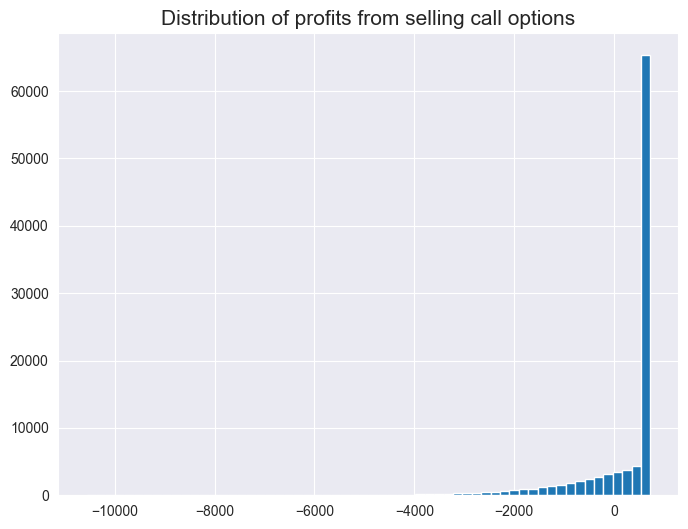

In [23]:
###Simulate payoffs of selling 100 call options, visualize payoffs with histogram
###Simulate payoffs of buying a 100 call options, visualize payoffs with histogram


S0 = 35
K = 37
sigma = .4
t = 1
r = 0.03
premium = bs_call(S0,K,sigma+.15,t,r)
options_sold = 100
n_sims = 100000

# Simulated stock path end points
random_noise = np.random.normal(0,1,n_sims)
exponent = (r-.5*sigma**2)*t + sigma*np.sqrt(t)*random_noise
end_points = S0*np.exp(exponent)

#Call_payouts
call_payouts = np.maximum(end_points - K, 0)

#Call values discounted to time 0
call_values = np.exp(-r*t)*call_payouts




#P&L from purchasing call options discounted to time 0
call_sold_profits = options_sold*(-call_values + premium)

#Visual of distribution of profits
plt.figure(figsize = (8,6))
plt.hist(call_sold_profits,bins = 60)
plt.title('Distribution of profits from selling call options', size = 15)

plt.show()



In [24]:
#Print data

expected_profit = np.mean(call_sold_profits)

std_error = np.std(call_sold_profits)/np.sqrt(n_sims)

max_loss = np.min(call_sold_profits)

max_profit = np.max(call_sold_profits)

print(f'Expected profit: ${expected_profit: .2f}')

print('----'*20)
print('----'*20)

print(f'Standard Error: ${std_error}')

print('----'*20)
print('----'*20)

print(f'Max Loss: ${max_loss:.2f}')

print('----'*20)
print('----'*20)

print(f'Max Profit: ${max_profit: .2f}')

print('----'*20)
print('----'*20)

Expected profit: $ 204.95
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Standard Error: $3.205687683776919
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Max Loss: $-10562.11
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Max Profit: $ 723.70
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [21]:
bs_call(S0,K,sigma+.15,t,r), bs_call(S0,K,sigma,t,r)

(7.236992376201252, 5.178110813285102)

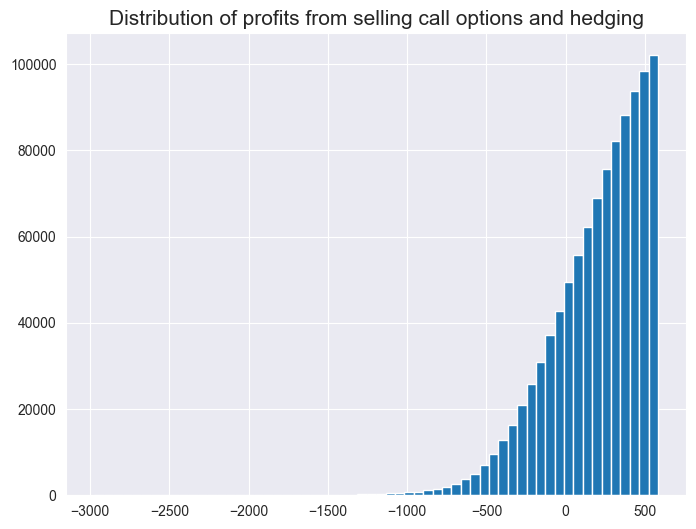

Expected profit: $ 197.22
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Standard Error: $0.2989739713833347
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Max Loss: $-2973.49
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Max Profit: $ 583.15
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [25]:
###Simulate payoffs of selling 100 call options and delta hedging at time of trade
### Visualize payoffs with histogram


S0 = 35
K = 34
sigma = .3
t = 1
r = 0.03
premium = bs_call(S0,K,sigma+.15,t,r)
options_sold = 100

# Simulated stock paths
n_sims = 1000000
random_noise = np.random.normal(0,1,n_sims)
exponent = (r - .5*sigma**2)*t + sigma*np.sqrt(t)*random_noise
end_points = S0*np.exp(exponent)

#Call_payouts
call_payouts = np.maximum(end_points - K,0)

#Call_payouts discounted to time 0
call_payouts_discounted = np.exp(-r*t)*np.maximum(end_points - K,0)

#Delta
#We are cheating for now in our simulation by using a Black-Scholes Formula for delta
delta = bs_call_delta(S0,K,sigma,t,r)


#P&L from stock at expiration
stock_profit = (end_points - np.exp(r*t)*S0)*delta

#P&L from stock valued to time 0
stock_profit_discounted = np.exp(-r*t)*(end_points - np.exp(r*t)*S0)*delta



#P&L from selling call options valued at time 0
call_sell_profits = options_sold*(premium - call_payouts_discounted + stock_profit_discounted)



#Visual of distribution of profits
plt.figure(figsize = (8,6))
plt.hist(call_sell_profits,bins = 60)
plt.title('Distribution of profits from selling call options and hedging', size = 15)

plt.show()

#Print data

expected_profit = np.mean(call_sell_profits)

std_error = np.std(call_sell_profits)/np.sqrt(n_sims)

max_loss = np.min(call_sell_profits)

max_profit = np.max(call_sell_profits)

print(f'Expected profit: ${expected_profit: .2f}')

print('----'*20)
print('----'*20)

print(f'Standard Error: ${std_error}')

print('----'*20)
print('----'*20)

print(f'Max Loss: ${max_loss:.2f}')

print('----'*20)
print('----'*20)

print(f'Max Profit: ${max_profit: .2f}')

print('----'*20)
print('----'*20)

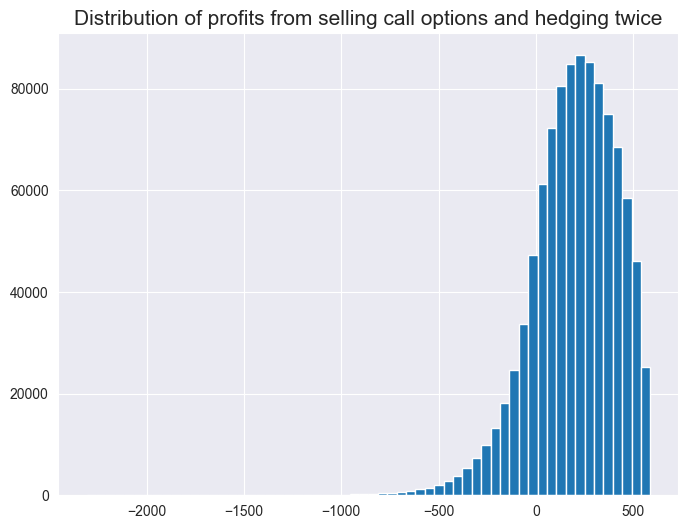

Expected profit: $ 197.18
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Standard Error: $0.2203795663025275
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Max Loss: $-2307.99
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Max Profit: $ 587.01
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [27]:
###Simulate payoffs of selling 100 call options and delta hedging at time of trade and half-way point
### Visualize payoffs with histogram
S0 = 35
K = 34
sigma = .3
t = 1
r = 0.03
premium = bs_call(S0,K,sigma+.15,t,r)
options_sold = 100




# Simulated stock paths with two steps
n_sims = 1000000
random_noise = np.random.normal(0,1,(n_sims,2))
exponent = (r - .5*sigma**2)*t/2 + sigma*np.sqrt(t/2)*random_noise
log_returns = np.cumsum(exponent, axis = 1)
paths = S0*np.exp(log_returns)

#isolate mid and end points of paths
mid_points = paths[:,0]
end_points = paths[:,1]


#Call_payouts discount to time 0
call_payouts = np.exp(-r*t)*np.maximum(end_points - K, 0)

#Delta
#We are cheating for now in our simulation by using a Black-Scholes Formula for delta
delta_initial = bs_call_delta(S0,K,sigma,t,r)
delta_mid = bs_call_delta(mid_points,K,sigma,t/2,r)


#P&L from stock discounted to time 0
stock_profit_mid = (mid_points - np.exp(r*t/2)*S0)*delta_initial*np.exp(-r*t/2)
stock_profit_end = (end_points - np.exp(r*t/2)*mid_points)*delta_mid*np.exp(-r*t)

#discounted stock profits to time 0
stock_profits_discounted = stock_profit_mid + stock_profit_end



#P&L from selling call options
call_sell_profits = options_sold*(premium - call_payouts + stock_profits_discounted)



#Visual of distribution of profits
plt.figure(figsize = (8,6))
plt.hist(call_sell_profits,bins = 60)
plt.title('Distribution of profits from selling call options and hedging twice', size = 15)

plt.show()

#Print data

expected_profit = np.mean(call_sell_profits)

std_error = np.std(call_sell_profits)/np.sqrt(n_sims)

max_loss = np.min(call_sell_profits)

max_profit = np.max(call_sell_profits)

print(f'Expected profit: ${expected_profit: .2f}')

print('----'*20)
print('----'*20)

print(f'Standard Error: ${std_error}')

print('----'*20)
print('----'*20)

print(f'Max Loss: ${max_loss:.2f}')

print('----'*20)
print('----'*20)

print(f'Max Profit: ${max_profit: .2f}')

print('----'*20)
print('----'*20)

### Remarks about Hedging Strategies

Profit distributions resulting from hedging strategies can potentially be improved by:

1. **Hedging more frequently**, which reduces the tracking error between the option and the hedge.
2. **Hedging adaptively**, such as only rebalancing when the portfolio's delta deviates beyond a specified threshold.
3. **Hedging against additional Greeks** or other risk factors that influence option prices, such as gamma, vega, or interest rate sensitivity.
4. **Hedging with other derivatives**, the delta of a put option is negative. Therefore delta hedging a sold call option can incorporate selling put options. This puts the seller in a position to profit from both the call option and put option premium.

### Hedging and Drift Terms

The process of $\Delta$-hedging, when taken to the continuous-time limit, eliminates the drift term from the dynamics of the hedged portfolio. This is a key insight in the derivation of the Black-Scholes equation, where stock price movements are modeled under the **risk-neutral measure**, effectively removing the real-world drift.

However, it is still valuable to simulate hedging strategies under models that include drift. Different drift rates can significantly impact how much rebalancing is needed to protect the profit earned from selling call or put option contracts.


In [54]:
#Monte-Carlo simulation of delta hedged sold call option with drift

def bs_MC_call_sell(S0, K, sigma, t, r, n_sim, n_hedges=1, P=0, num_options=1, mu = 0):
    """
    Monte Carlo simulation for profit distribution of delta hedging at regular intervals a sold call option.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility (annualized)
        t (float): Time to expiration in years
        r (float): Risk-free interest rate
        n_sim (int): Number of Monte Carlo simulation paths
        n_hedges (int): Number of hedge rebalancing intervals
        P (float): Premium received per option sold
        num_options (int): Number of options sold
        mu (float): Drift of stock movement

    Returns:
        np.ndarray: Profit and loss of the dynamically hedged portfolio under each simulation at regular intervals
        
        
    Additional Information:
    Default values of mu = 0, P = 0, and num_options = 1 returns the 
    negative simulated Black-Scholes value of a call option
    with n_hedges number of control variates in simulation.
    """
    dt = t / n_hedges
    times = np.linspace(t - dt, 0, n_hedges)  # Time remaining at each hedge step

    # Simulate asset paths
    random_noise = np.random.normal(0, 1, size=(n_sim, n_hedges))
    log_returns = (mu+r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_noise
    log_paths = np.cumsum(log_returns, axis=1)
    S_paths = S0 * np.exp(log_paths)
    
    # Adjoin S0 to beginning of each stock path
    S_paths = np.hstack([S0 * np.ones((n_sim, 1)), S_paths])  # Shape: (n_sim, n_hedges + 1)

    # Compute discounted stock profits from each hedge interval
    # We are still cheating in the simulation as we use the black-scholes formula for delta
    discounted_stock_profits = []
    for i in range(n_hedges):
        S_start = S_paths[:, i]
        S_end = S_paths[:, i + 1]
        tte = t - i * dt
        delta = bs_call_delta(S_start, K, sigma, tte, r)
        stock_profit = np.exp(-r * (i * dt)) * (S_end - np.exp(r * dt) * S_start) * delta
        discounted_stock_profits.append(stock_profit)

    # Convert list of arrays to shape (n_hedges, n_sim), then sum over hedge steps
    total_stock_profit = np.sum(discounted_stock_profits, axis=0)  # shape (n_sim,)

    # Call payouts at final time
    S_end = S_paths[:, -1]
    call_payouts = np.exp(-r * t) * np.maximum(S_end - K, 0)

    # Final P&L
    pnl = num_options * (P - call_payouts + total_stock_profit)

    return pnl


In [59]:
##Demonstration that Delta hedging removes drift from Black-Scholes Price

S0 = 35
K = 34
sigma = .3
t = 1
r = 0.03
premium = 0
options_sold = 1
n_sim = 100000
mu = .8


print(f'Black-Scholes value of call option: ${bs_call(S0,K,sigma,t,r):.2f}')

print('----'*20)
print('----'*20)



n_delta_hedges = [1,10,20,30, 50, 100, 200, 400]

for n in n_delta_hedges:
    X = -bs_MC_call_sell(S0, K, sigma, t, r, n_sim, n_hedges=n, P=0, num_options=1, mu = mu)
    
    print(f'Black Scholes simulated value with {n} delta hedges: ${np.mean(X):.2f}')
    print('----'*20)
    print('----'*20)



Black-Scholes value of call option: $5.13
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Black Scholes simulated value with 1 delta hedges: $16.86
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Black Scholes simulated value with 10 delta hedges: $5.68
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Black Scholes simulated value with 20 delta hedges: $5.40
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Black Scholes simulated value with 30 delta hedges: $5.31
------------------------------------------------------------------------------